# This Notebook demonstrates Exploratory Data Analysis and Visualization along with Prediction on Iris Dataset

###  This notebook deals with Exploratory Data Analysis and Visualization using Matplotlib,Seaborn and Plotly. Along with this we build model with various classification alogorithms and finally check accuracy of each model.   If you are a complete begginer or want a crisp understanding of EDA and advanced Visualizations, stay tuned!!!

### IRIS Dataset
This is perhaps the best known dataset to be found in the pattern recognition literature. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris flower. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. Let dive deep into Analysis of data to predict the type of Iris flower based on the length and width of sepals and petals.

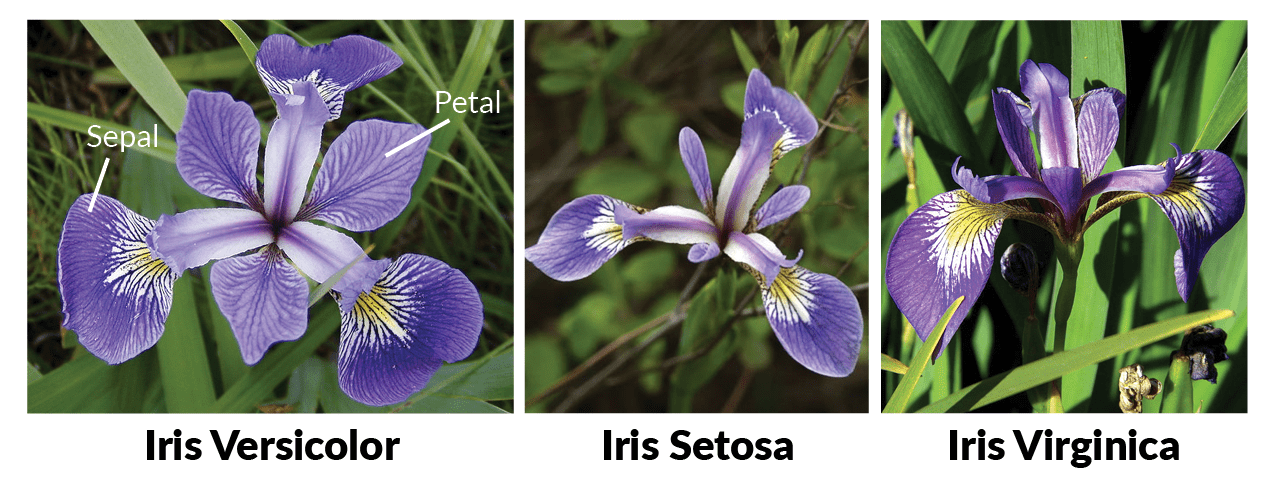

In [1]:
from IPython.display import Image
Image(r'C:\Users\dell pc\Desktop\iris-machinelearning.png',width=600,height=400)

In [2]:
# importing all neccessary libraries for Exploratory Data Analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.express as px
iris=pd.read_csv(r'C:\Users\dell pc\Downloads\Iris.csv')


Bad key "text.kerning_factor" on line 4 in
C:\Users\dell pc\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


Reading Dataset features like : shape of dataset, features(columns) of dataset and data type of each feature

In [3]:
#getting idea of dataset
iris.head(2),iris.shape,iris.dtypes

(   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
 0   1            5.1           3.5            1.4           0.2  Iris-setosa
 1   2            4.9           3.0            1.4           0.2  Iris-setosa,
 (150, 6),
 Id                 int64
 SepalLengthCm    float64
 SepalWidthCm     float64
 PetalLengthCm    float64
 PetalWidthCm     float64
 Species           object
 dtype: object)

Insights:: We have five features - Id,Sepal Length, Sepal Width, Petal Length, and Petal Width and one target field : Species.One column (Id) is of no use for us. So now we will drop that column permanently(using inplace= True). So now we have to predict the species (dependant column) based on the values of other 4 columns (independant columns). Also by checking Datatypes of columns, we find out that there is no need to change the datatype of the numerical columns.

In [4]:
iris.drop('Id',axis=1,inplace=True)
iris.columns  # to check that the column 'Id' is Dropped

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Now to check that IRIS dataset is a balanced dataset or an imbalanced dataset,We are plotting piechart to see distribution among various classes of dataset.


In [5]:
labels=iris['Species'].unique()
values=iris['Species'].value_counts()
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
py.iplot(fig)

#### From above Pie chart it's clear that our dataset is perfectly balanced dataset

## Let's Begin Exploratory Data Analysis

Now firstly, we need to check the relation between various independant columns and also with the dependant one.

Tip : Instead of building multiple individual graphs between 2 variables it's better to go for pairplot. 

C:\Users\dell pc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



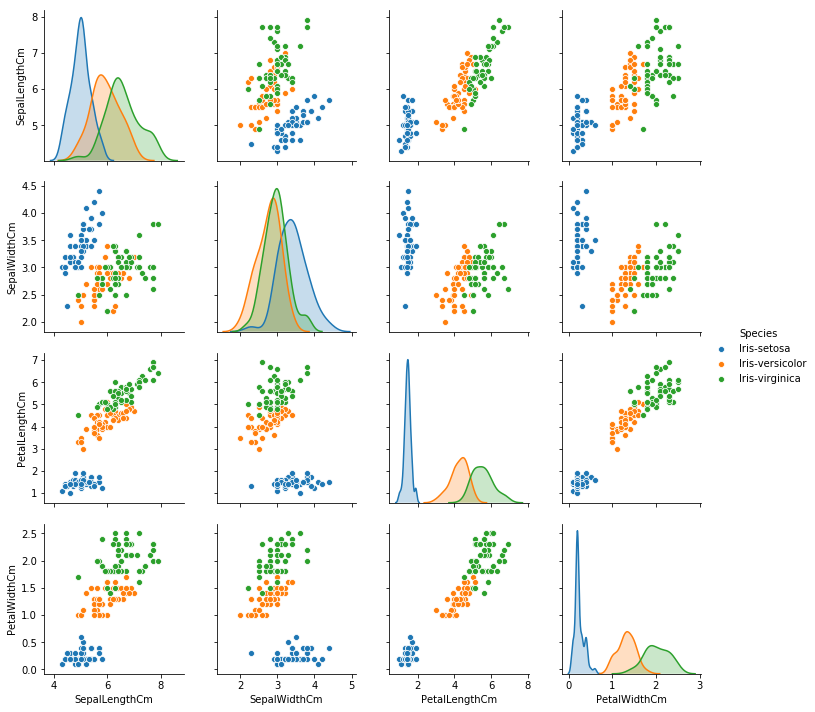

In [6]:
sns.pairplot(iris,hue='Species')

From Pairplot, we can see that :

Iris-setosa is linearly distinguished from other two kinds of iris flower(Versicolor and Virginica).

### Now let us see how the length and width of petals and sepals vary according to the species

In [7]:
from plotly.subplots import make_subplots
fig = make_subplots(
    rows=2, cols=2)
fig.add_trace(go.Violin(x=iris['Species'],y=iris['PetalWidthCm'],box_visible=True,meanline_visible=True,name='PetalWidth'),row=1,col=1)
fig.add_trace(go.Violin(x=iris['Species'],y=iris['PetalLengthCm'],box_visible=True,meanline_visible=True,name='PetalLength'),row=1,col=2)
fig.add_trace(go.Violin(x=iris['Species'],y=iris['SepalWidthCm'],box_visible=True,meanline_visible=True,name='SepalWidth'),row=2,col=1)
fig.add_trace(go.Violin(x=iris['Species'],y=iris['SepalLengthCm'],box_visible=True,meanline_visible=True,name='SepalLength'),row=2,col=2)
fig.update_layout(height=600, width=1000, title_text="Length and Width variation of Sepals and Petals according to the species")
py.iplot(fig)

#### Here instead of using separately Histogram for Probability distribution function and Boxplot for statistical data based on the minimum, first quartile, median, third quartile, and maximum we can use Violin plot alone because it represents all the features that are represented by both histogram and boxplot separately.

Hover mouse over plot to get more info.

#### The thinner part denotes that there is less density whereas the fatter part conveys higher density.

### Let's see correlation between each column of dataset by plotting HeatMap.

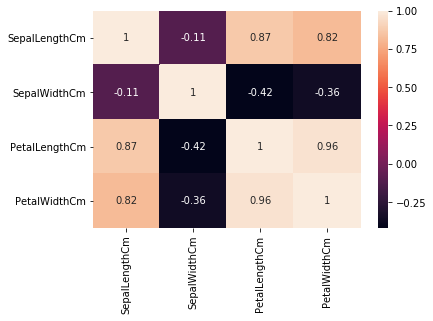

In [8]:
#heatmap
sns.heatmap(iris.corr(),annot=True)

#### From Above Heatmap it is clear that Petal length and Petal Width are highly correlated to each other.

So both features contribute approximately same in prediction of Species.

So, we will try in both the ways i.e. by taking both columns and by dropping one of them to check how much they affect the accuracy of prediction.

## Let's start with predicting of type of Iris flower.

In [9]:
#importing neccessary libraries and fuctions for machine learning
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings  
warnings.filterwarnings('ignore')

### From context, it's clear that out of Classification and Regression, this is a classification problem.

### As we have to predict based on the independent features that which type/class of Iris flower it is.

### Classification Algorithms we'll cover here:
#### 1.Logistic Regression
#### 2.K Nearest Neighbours (KNN)
#### 3.Decision Tree
#### 4.Support Vector Classifier (SVC)
#### 5.XGBoost

In [10]:
#splitting the data into training data and testing data
x=iris.drop('Species',axis=1)
y=iris['Species']
x_train, x_test, y_train, y_test = train_test_split(x, y)

### Logistic Regression

In [11]:
lr_model = LogisticRegression() #select the algorithm
lr_model.fit(x_train,y_train) # we train the algorithm with the training data and the training output
lr_predict = lr_model.predict(x_test) #now we pass the testing data to the trained algorithm
print('Accuracy obtained using Logistic Regression - ',round(accuracy_score(lr_predict,y_test)*100,2),'%') #now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

Accuracy obtained using Logistic Regression -  100.0 %


### K Nearest Neighbours (KNN)

In [12]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)
knn_predict=knn_model.predict(x_test)
print('Accuracy obtained using K Nearest Neighbours (KNN) - ',round(accuracy_score(knn_predict,y_test)*100,2),'%')

Accuracy obtained using K Nearest Neighbours (KNN) -  100.0 %


### Decision Tree

In [13]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
dt_predict=dt_model.predict(x_test)
print('Accuracy obtained using Decision Tree - ',round(accuracy_score(dt_predict,y_test)*100,2),'%')

Accuracy obtained using Decision Tree -  97.37 %


### XGBoost

In [14]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
predict=xgb_model.predict(x_test)
accuracy_score(predict,y_test)
print('Accuracy obtained using XGBoost - ',round(accuracy_score(predict,y_test)*100,2),'%')

Accuracy obtained using XGBoost -  97.37 %


### Support Vector Classifier (SVC)

In [15]:
svc_model = svm.SVC()
svc_model.fit(x_train,y_train)
svc_predict=svc_model.predict(x_test)
print('Accuracy obtained using Support Vector Classifier (SVC) -',round(accuracy_score(svc_predict,y_test)*100,2),'%')

Accuracy obtained using Support Vector Classifier (SVC) - 100.0 %


#### Now we'll try building by dropping one of the petal length or petal width as they are highly correlated to each other(refer to heatmap above) and check the accuracy

In [18]:
x1=iris.drop(['Species','PetalWidthCm'],axis=1)  # dropping PetalWidthCm also
y1=iris['Species'] 
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1)

In [19]:
xgb_model = XGBClassifier()
xgb_model.fit(x1_train, y1_train)
predict=xgb_model.predict(x1_test)
accuracy_score(predict,y1_test)
print('Accuracy obtained using XGBoost - ',round(accuracy_score(predict,y1_test)*100,2),'%')

Accuracy obtained using XGBoost -  100.0 %


##### Here, We tried by dropping Petal Width feature from the dataset and then applied XGBoost. You can see that accuracy is almost same and even for other algorithms or by dropping Petal Length you find that accuracy will be approximately same with +/-(2-3%) variation due to very high correlation between both parameters.

### Observations:

1. Iris Dataset is a Balanced dataset.

2. Iris Setosa is clearly differentiable from Virginica and Versicolor. 3. Petal Length and Petal Width are highly correlated to each other.

4. By dropping one of Petal Length or Petal Width, prediction accuracy is not affected much.

5. Support Vector Classifier (SVC) performed best for classification amongst other algorithms of Classification.

###### Thus we have just implemented almost every classification algorithm and along with EDA and visualization.

Although this dataset is small and basic one with no missing values or categorical fields, so I'm not able to cover major portion of Data Cleansing,Feature Engineering,Feature Selection or Feature scaling and will try to do these same in my other notebooks.

######  I hope the notebook was useful to you to get started with Machine Learning/ Data Analysis.

### Thank You !!!